<h1 align=center style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
لبه قطعه‌ها
</font>
</h1>

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
مقدمه
</font>
</h2>

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
در این تمرین قصد داریم تا با استفاده از لبه‌یابی، قطعه بندی را انجام دهیم. در ادامه با بخش های مختلف تمرین آشنا خواهیم شد.
</font>
</p>

In [113]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

<h3 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
مرحله اول: وارد کردن تصویر
</font>
</h3>

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
ابتدا تصویر زیر را بصورت خاکستری بخوانید.
<br>
Data/eagle.jpg
</font>
</p>

In [114]:
img = cv2.imread('Data/eagle.jpg', cv2.IMREAD_GRAYSCALE)

<h3 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
مرحله دوم: لبه‌یابی به عنوان پیش‌پردازش
</font>
</h3>

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
در این مرحله روی تصویر یک فاز تیزسازی باید انجام دهید. به ازای یکی از فیلترهای معرفی شده این عملیات را انجام دهید. 
<br>
 حتما خروجی این بخش را نمایش دهید تا ببنید در اثر اعمال تیزسازی تصویر چگونه تغییر خواهد کرد.
</font>
</p>

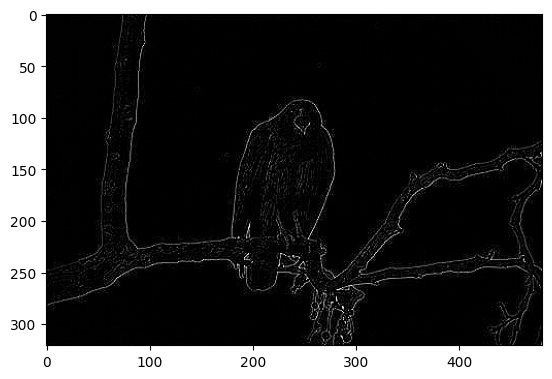

In [115]:
laplacian_kernel = np.array([[0, -1, 0],
                [-1, 4, -1],
                [0, -1, 0]])
sharp_mask = cv2.filter2D(img, -1, laplacian_kernel)
sharp_mask = cv2.convertScaleAbs(sharp_mask)
plt.imshow(sharp_mask, cmap='gray')
plt.show()

-<h3 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
مرحله سوم: قطعه‌بندی
</font>
</h3>

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
حال بر روی تصویری که تیزسازی را بر روی آن انجام دادید باید قطعه‌بندی را انجام دهید.
</font>
</p>

In [116]:
_, thresh = cv2.threshold(sharp_mask, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

<h3 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
مرحله چهارم: قطعه‌بندی
</font>
</h3>

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
    در این مرحله باید قطعه‌بندی خود را نهایی کنید. 
    <br>
    دقت کنید که حتما تصویر قطعه‌بندی شده دارای پیش‌زمینه <b>سفید</b> باشد و قطعات شما با مرز <b>سیاه</b> از همدیگر جدا شده باشند.
</font>
</p>

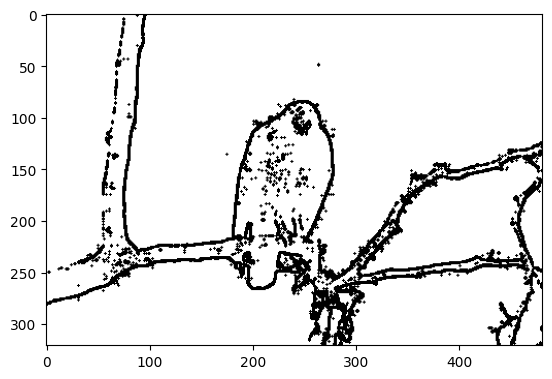

In [122]:
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
image_segment = np.zeros(img.shape, np.uint8)
cv2.drawContours(image_segment, contours, -1, 255, 2)
sg = 255 - image_segment
plt.imshow(sg, cmap='gray')
plt.show()

<h3 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
مرحله پنجم: ذخیره‌سازی
</font>
</h3>

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
در این مرحله تصویر قطعه‌بندی شده نهایی را با فایلی به نام زیر ذخیره کنید:
    <br>
    segmented_eagle.jpg
</font>
</p>

In [123]:
cv2.imwrite('segmented_eagle.jpg', sg)

True

<h3 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
مرحله پنجم: سلول جواب‌ساز
</font>
</h3>

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
بدون هیچگونه تغییری، این سلول را اجرا کنید تا فایل پاسخ شما آماده شود.
</font>
</p>

In [124]:
import zipfile

def compress(file_names):
    print("File Paths:")
    print(file_names)
    # Select the compression mode ZIP_DEFLATED for compression
    # or zipfile.ZIP_STORED to just store the file
    compression = zipfile.ZIP_DEFLATED
    # create the zip file first parameter path/name, second mode
    with zipfile.ZipFile("result.zip", mode="w") as zf:
        for file_name in file_names:
            # Add file to the zip file
            # first parameter file to zip, second filename in zip
            zf.write('./' + file_name, file_name, compress_type=compression)


file_names = ["notebook.ipynb", "segmented_eagle.jpg"]
compress(file_names)

File Paths:
['notebook.ipynb', 'segmented_eagle.jpg']
